In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Data Science 2024\Study\Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


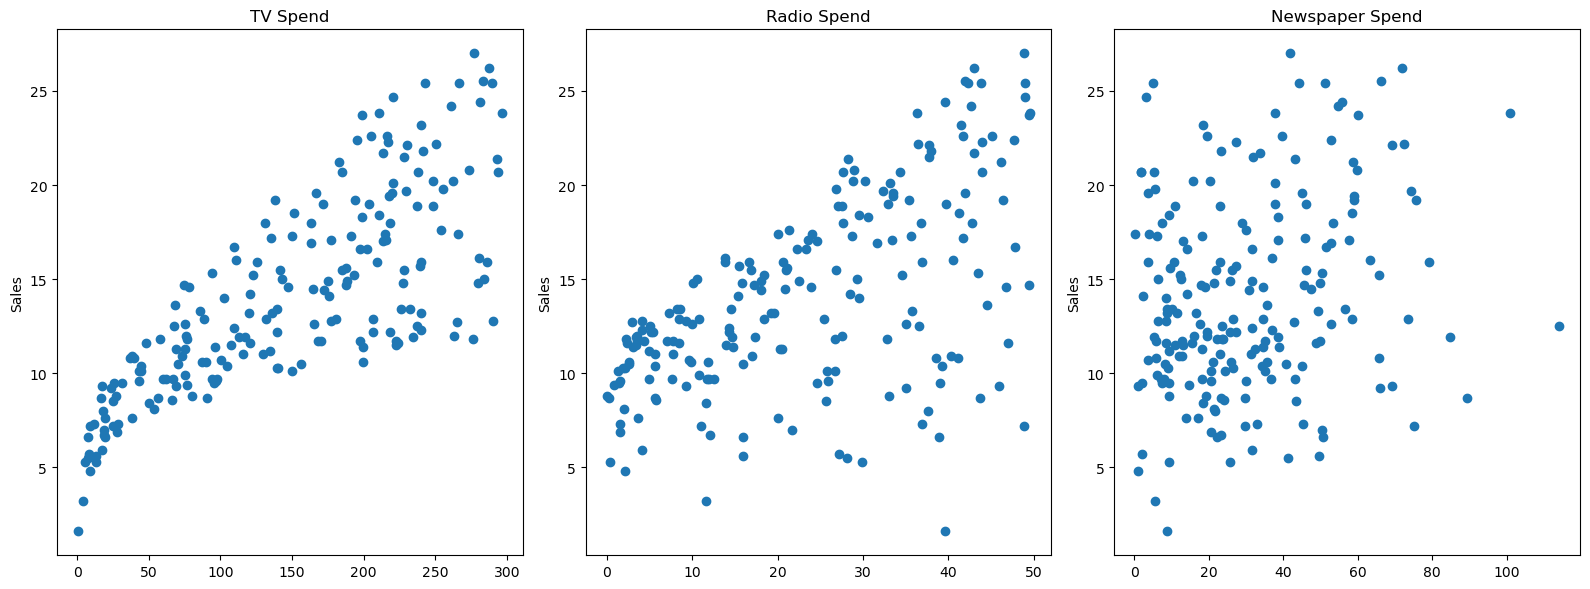

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

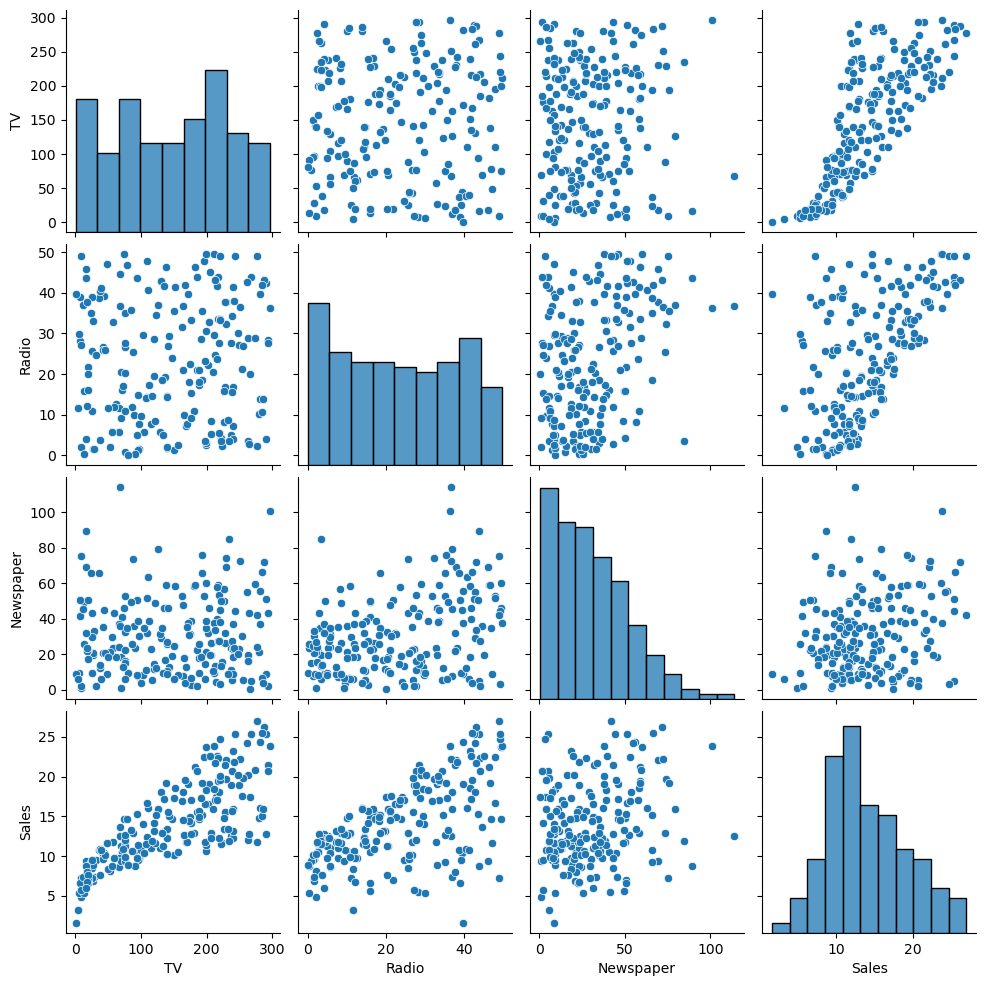

In [3]:
sns.pairplot(df) #plots graphs of relationship of all feartures against one another

In [4]:
#select features or independant variable
X = df.drop('Sales',axis=1) # axis = 1 means column ie. Drop the column
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
# separate dependant variable y or labeled data
y = df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [7]:
# Keeps the order of below variables as is ie. X_train, X_test, y_train, y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(134, 66, 134, 66)

In [8]:
from sklearn.linear_model import LinearRegression
#help(LinearRegression)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train) # it is modeling training step using Training dataset

LinearRegression()

In [11]:
test_predictions = model.predict(X_test)  # get the predicted value against X Test Dataset
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
df['Sales'].mean()

14.0225

<Axes: xlabel='Sales', ylabel='Count'>

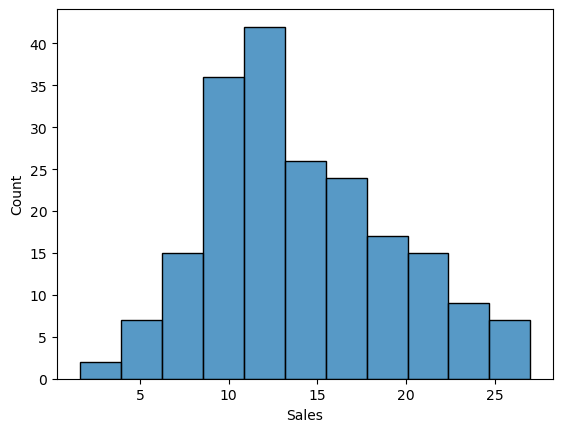

In [14]:
sns.histplot(data=df, x='Sales')

In [15]:
# Performance Metrics for Regressions MAE, MSE, RMSE
mean_absolute_error(y_test, test_predictions)

1.4937750024728969

In [16]:
mean_squared_error(y_test,test_predictions)

3.7279283306815114

In [17]:
#Root Mean Square Error RMSE
rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
rmse

1.9307843822347206

### Calculate Resuduals

In [19]:
test_residuals = y_test - test_predictions

In [20]:
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: Sales, Length: 66, dtype: float64

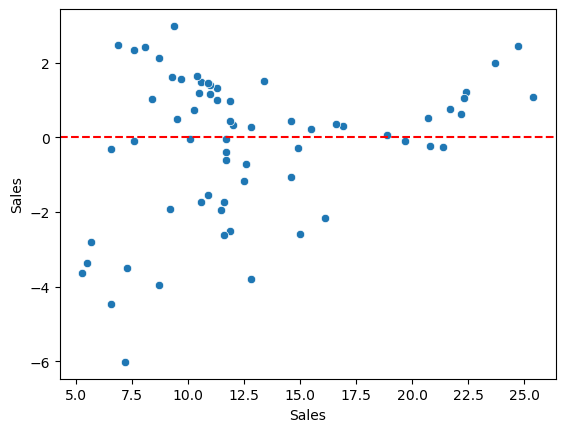

In [21]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

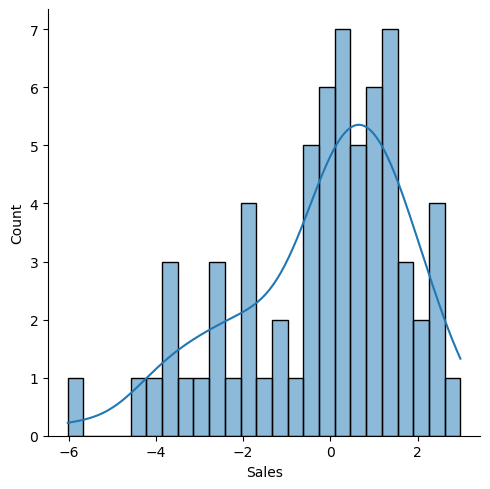

In [22]:
sns.displot(test_residuals,bins=25,kde=True)

In [23]:
final_model = LinearRegression()
final_model.fit(X,y)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [24]:
final_model.coef_     #these are m (slope) coefficient for TV, Radio, Newspaper Respectively ie. for X features

array([ 0.04576465,  0.18853002, -0.00103749])

From above result
 1. Newspaper coeff is almost 0 or very small negative value, close to zero.
 2. Means Newspaper Spending is not contributing at all for increase in Sales
 3. Radio coefficient with 0.1885 is at top and actually has contribution in increasing sales
 4. TV coeff with 0.0457 is also making small increase in Sales.
 5. Conclusion - We can drop of newspaper spending which is not helpfult for increasing the Sales

* How to Interpret coeff
* increase in Unit spending in TV will actually increase sales by 0.045 unites of sales(e.g Sales in terms of currency or Quantity)
* increase in Unit spending in Radio will actually increase sales by 0.1885 units of sales.
* Increase in Unit spending in Newspaper will actually decrease sales by 0.001 units.

In [56]:
# dump or store your model to share it with others or to deploy it
from joblib import dump, load
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [58]:
# Load the store model to use
loaded_model = load('final_sales_model.joblib')

In [60]:
# Get the coeff
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
X.shape

(200, 3)

In [66]:
# share ps 2D, as there are no. rows as well as no. columns
campaign = [[149,22,12]]  #2d array to match the shape of X features

In [68]:
loaded_model.predict(campaign)

C:\Users\meyog\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

* So our loaded model predicted that total sales to be increase by 13.89 units in the upcoming compaign
* Where we are pending 149 on TV ads, 22 for Radio ads and 12 on Newspaper ads

* Accuracy can be calculate using metrices like mean absolute error, mean squared error or root mean squared error

# End of the Task